In [15]:
! pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 360.6 kB/s eta 0:00:21
   -- ------------------------------------- 0.5/7.8 MB 360.6 kB/s eta 0:00:21
   -- ------------------------------------- 0.5/7.8 MB 360.6 kB/s eta 0:00:21
   ---- ----------------------------------- 0.8/7.8 MB 356.5 kB/s eta 0:00:20
   ---- ----------------------------------- 0.8/7.8 MB 356.5 kB/s eta 0:00:20
   ----- ---------------------------------- 1.0/7.8 MB 436.6 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/7

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt




In [9]:
# Specify the folder containing the CSV files
folder_path = r"C:\Users\ASUS\Desktop\CASE2\CASE2\WorldCup_Stats"




In [11]:
# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]



In [12]:
# Load all CSV files into a list of DataFrames
dataframes = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]

# Concatenate all DataFrames into a single DataFrame
crick_df = pd.concat(dataframes, ignore_index=True)

# Display the resulting DataFrame
print(crick_df)

     Unnamed: 0.1  Unnamed: 0        date        venue match_category team_1  \
0               0          20  1992-03-08     Auckland   League-Match     WI   
1               1          21         NaN     Brisbane   League-Match     SA   
2               2          15  1992-03-04       Sydney   League-Match    IND   
3               3           5  1992-02-26       Sydney   League-Match    AUS   
4               4          23  1992-03-10   Wellington   League-Match    IND   
..            ...         ...         ...          ...            ...    ...   
431            45          18  2023-10-21      Lucknow   League-Match    NED   
432            46          40  2023-11-09    Bengaluru   League-Match     SL   
433            47           1  2023-10-06    Hyderabad   League-Match    PAK   
434            48          44  2023-11-12    Bengaluru   League-Match    IND   
435            49           6  2023-10-10   Dharamsala   League-Match    ENG   

    team_2  team_1_runs  team_1_wickets

Table of team_1 Pie Chart Data:
                  Team  Count  Percentage
team_1                                   
AUS                AUS     48        11.0
IND                IND     44        10.1
SL                  SL     42         9.6
NZ                  NZ     38         8.7
SA                  SA     37         8.5
PAK                PAK     36         8.3
ENG                ENG     34         7.8
WI                  WI     27         6.2
ZIM                ZIM     26         6.0
BAN                BAN     24         5.5
KENYA            KENYA     17         3.9
AFG                AFG     13         3.0
NED                NED     12         2.8
IRE                IRE     10         2.3
SCOT              SCOT      9         2.1
CAN                CAN      7         1.6
UAE                UAE      6         1.4
Australia    Australia      2         0.5
BER                BER      1         0.2
Pakistan      Pakistan      1         0.2
India            India      1         0.2
Ba

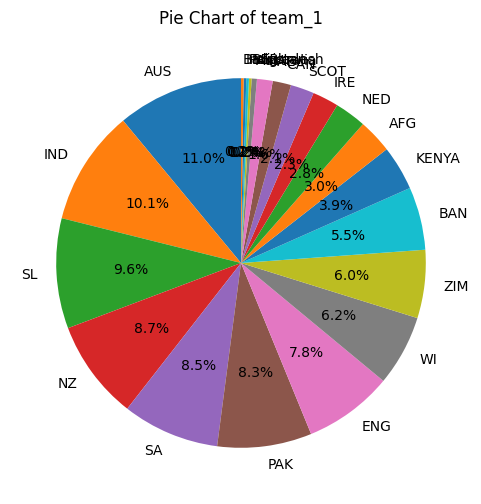

In [17]:
# Assuming crick_df is your DataFrame
# Count the values for the 'team_1' column
team_1_counts = crick_df['team_1'].value_counts()

# Create a DataFrame for the table
table_data = pd.DataFrame({
    'Team': team_1_counts.index,
    'Count': team_1_counts.values,
    'Percentage': (team_1_counts / team_1_counts.sum() * 100).round(1)
})

# Display the table
print("Table of team_1 Pie Chart Data:")
print(table_data)

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    team_1_counts,
    labels=team_1_counts.index,  # Add category names as labels
    autopct='%1.1f%%',           # Show percentages on the pie chart
    startangle=90                # Rotate the chart for better readability
)

# Add title and show the plot
plt.title('Pie Chart of team_1')
plt.show()



In [18]:
# Replace country names with abbreviations in 'team_1' and 'team_2' columns
crick_df[['team_1', 'team_2']] = crick_df[['team_1', 'team_2']].replace({
    'Australia': 'AUS',
    'Pakistan': 'PAK',
    'India': 'IND',
    'Bangladesh': 'BAN',
    'New Zealand':'NZ',
    'West Indies': 'WI',
    'Sri Lanka':'SL'
})

# Display the updated DataFrame
print(crick_df)


     Unnamed: 0.1  Unnamed: 0        date        venue match_category team_1  \
0               0          20  1992-03-08     Auckland   League-Match     WI   
1               1          21         NaN     Brisbane   League-Match     SA   
2               2          15  1992-03-04       Sydney   League-Match    IND   
3               3           5  1992-02-26       Sydney   League-Match    AUS   
4               4          23  1992-03-10   Wellington   League-Match    IND   
..            ...         ...         ...          ...            ...    ...   
431            45          18  2023-10-21      Lucknow   League-Match    NED   
432            46          40  2023-11-09    Bengaluru   League-Match     SL   
433            47           1  2023-10-06    Hyderabad   League-Match    PAK   
434            48          44  2023-11-12    Bengaluru   League-Match    IND   
435            49           6  2023-10-10   Dharamsala   League-Match    ENG   

    team_2  team_1_runs  team_1_wickets

In [19]:
# Remove rows with null values (where all cells are NaN)
df_cleaned = crick_df.dropna(how='all')

# Remove columns with all NA values
df_cleaned = df_cleaned.dropna(axis=1, how='all')

# Remove duplicate rows based on specific columns
df_cleaned = df_cleaned.drop_duplicates(subset=['team_1', 'team_2', 'team_1_runs', 'team_1_wickets', 'team_2_runs', 'team_2_wickets'])

# Display the cleaned DataFrame
print(df_cleaned)

     Unnamed: 0.1  Unnamed: 0        date        venue match_category team_1  \
0               0          20  1992-03-08     Auckland   League-Match     WI   
1               1          21         NaN     Brisbane   League-Match     SA   
2               2          15  1992-03-04       Sydney   League-Match    IND   
3               3           5  1992-02-26       Sydney   League-Match    AUS   
4               4          23  1992-03-10   Wellington   League-Match    IND   
..            ...         ...         ...          ...            ...    ...   
431            45          18  2023-10-21      Lucknow   League-Match    NED   
432            46          40  2023-11-09    Bengaluru   League-Match     SL   
433            47           1  2023-10-06    Hyderabad   League-Match    PAK   
434            48          44  2023-11-12    Bengaluru   League-Match    IND   
435            49           6  2023-10-10   Dharamsala   League-Match    ENG   

    team_2  team_1_runs  team_1_wickets

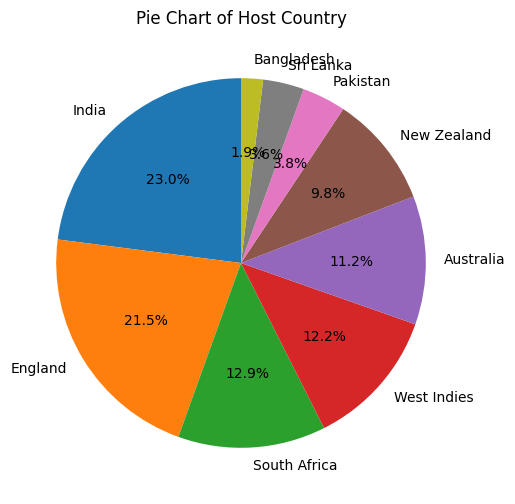

In [20]:
# Assuming df_cleaned is your DataFrame
# Plot the pie chart for the 'host_country' column

df_cleaned['host_country'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Show percentages
    figsize=(6, 6),     # Set figure size
    labels=df_cleaned['host_country'].value_counts().index,  # Add category names as labels
    startangle=90       # Rotate the chart for better readability
)

# Add title and show the plot
plt.title('Pie Chart of Host Country')
plt.ylabel('')  # Remove the y-axis label for a cleaner look
plt.show()

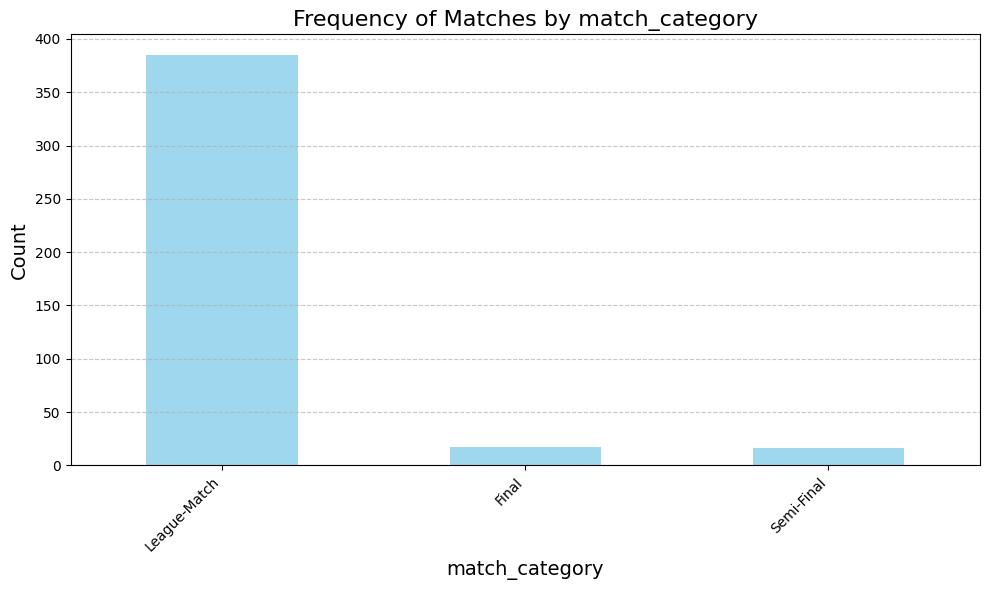

In [21]:
# Calculate the counts of unique values in the 'match_category' column
match_category_counts = df_cleaned['match_category'].value_counts()

# Plot the bar graph for the summarized counts
plt.figure(figsize=(10, 6))
match_category_counts.plot(kind='bar', color='skyblue', alpha=0.8)

# Step 3: Customize the graph
plt.title('Frequency of Matches by match_category', fontsize=16)
plt.xlabel('match_category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [22]:
# Descriptive statistics for the specified columns
descriptive_stats = df_cleaned[['team_1_runs', 'team_2_runs']].describe()

print(descriptive_stats)


       team_1_runs  team_2_runs
count   410.000000   405.000000
mean    245.002439   198.846914
std      76.967923    61.877844
min       1.000000    24.000000
25%     198.000000   157.000000
50%     244.500000   202.000000
75%     301.750000   236.000000
max     428.000000   383.000000


In [23]:
# Descriptive statistics for the specified columns
descriptive_stats_1 = df_cleaned[['team_1_wickets', 'team_2_wickets']].describe()

print(descriptive_stats_1)


       team_1_wickets  team_2_wickets
count      410.000000      405.000000
mean         4.504878        2.720988
std          3.476955        2.975757
min          0.000000        0.000000
25%          0.000000        0.000000
50%          6.000000        2.000000
75%          7.000000        5.000000
max          9.000000        9.000000


In [24]:
# Get the current working directory
current_dir = os.getcwd()

# Define the file name
file_name = 'output_new.csv'

# Construct the full file path
file_path = os.path.join(current_dir, file_name)

# Save the DataFrame to the CSV file at the specified location
try:
    df_cleaned.to_csv(file_path, index=False)
    print(f"File saved successfully at: {file_path}")
except Exception as e:
    print(f"An error occurred while saving the file: {e}")

# Verify the saved file
print("Files in the current directory:", os.listdir(current_dir))

File saved successfully at: c:\Users\ASUS\Desktop\python codes\Group_17\Group_17\output_new.csv
Files in the current directory: ['.git', 'data exploration and visualization.ipynb', 'output_new.csv', 'README.md']


In [25]:
# Step 1: Create match_status column
# If 'result' contains 'abandoned', set match_status to 'abandoned'; otherwise, 'played'
crick_df['match_status'] = crick_df['result'].apply(
    lambda x: 'abandoned' if 'abandoned' in x.lower() else 'played'
)



In [14]:
# Step 2: Create winning_team column
def extract_winning_team(result):
    if 'abandoned' in result.lower():
        return None
    elif 'won by' in result:
        return result.split(' won by')[0]
    return None

crick_df['winning_team'] = crick_df['result'].apply(extract_winning_team)
